In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [46]:
f = open('../crime-data-process/results/borough_month.out','rb')
lines= f.read().strip().decode('utf-8').split('\n')
f.close()
pairs = [line.split('\t') for line in lines]
keys = []
months = []
years = []
values = []
for pair in pairs:
    try:
        months.append(int(pair[0].split()[1]))
        years.append(int(pair[0].split(' ')[2]))
        keys.append(pair[0].split(' ')[0])
        values.append(int(pair[1]))
    except ValueError:
        months.append(int(pair[0].split()[2]))
        years.append(int(pair[0].split(' ')[3]))
        keys.append(pair[0].split(' ')[0] + ' ' + pair[0].split(' ')[1])
        values.append(int(pair[1]))
df = pd.DataFrame([[key,months[i],years[i], values[i]] for i,key in enumerate(keys)],\
                  columns=['area','month','year','count'])
df = df.sort_values(by=['year','month'])
df['date'] = df['year'].map(str) + ' ' + df['month'].map(str)
print(df)
xtdf = df.pivot_table(index='date',columns='area',values='count')
xtdf.columns.drop(xtdf.columns[0])
print(xtdf)

              area  month  year  count     date
0    STATEN ISLAND      1  2006   2209   2006 1
33           BRONX      1  2006   9833   2006 1
49       MANHATTAN      1  2006  10652   2006 1
52          QUEENS      1  2006   9088   2006 1
54        BROOKLYN      1  2006  13430   2006 1
6    STATEN ISLAND      2  2006   1975   2006 2
8        MANHATTAN      2  2006   9157   2006 2
18        BROOKLYN      2  2006  11081   2006 2
20          QUEENS      2  2006   7787   2006 2
29           BRONX      2  2006   8159   2006 2
9        MANHATTAN      3  2006  10769   2006 3
19          QUEENS      3  2006   9056   2006 3
26   STATEN ISLAND      3  2006   2233   2006 3
39           BRONX      3  2006   9951   2006 3
59        BROOKLYN      3  2006  13112   2006 3
1            BRONX      4  2006   9206   2006 4
30          QUEENS      4  2006   8773   2006 4
32   STATEN ISLAND      4  2006   2226   2006 4
40       MANHATTAN      4  2006  10313   2006 4
50        BROOKLYN      4  2006  12930  

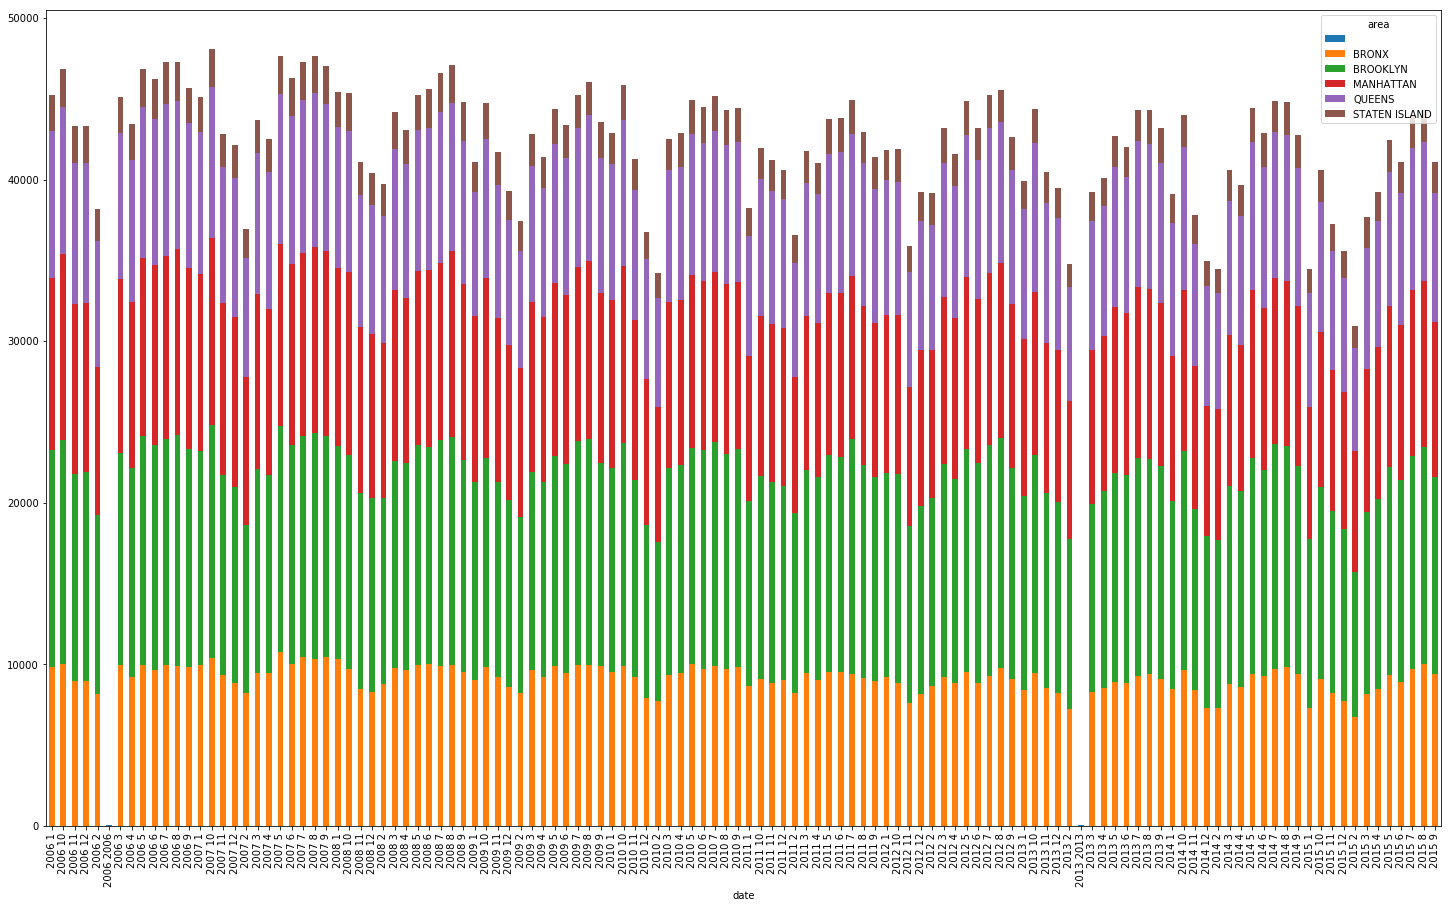

In [44]:
xtdf.plot.bar(stacked=True, figsize = (25, 15))
plt.xlabel
plt.savefig('borough_month')
plt.show()